# ĐỀ THI GIỮA KÌ 
## Môn: Tối ưu hoá cho Khoa học dữ liệu
## Ngày: 28/10/2023
## Lớp: DHKHDL17A. Thời gian: 90 phút

### Câu 1 (3 điểm)

Một cơ sở sản xuất đồ gỗ dự định sản xuất ba loại sản phẩm là bàn,
ghế và tủ. Định mức sử dụng lao động, chi phí sản xuất và giá bán mỗi sản phẩm mỗi loại ước tính trong bảng sau:

| Các yếu tố   |  Bàn |  Ghế | Tủ |
|---|---|---|---|
| Lao động (ngày công)   |  2 | 1  | 3  |
| Chi phí sản xuất (ngàn đồng)   | 100 | 40  | 250  |
| Giá bán (ngàn đồng)   | 260  | 120  |  600 |

Bài toán đặt ra là xác định số sản phẩm mỗi loại cần phải sản xuất sao cho không bị động trong sản xuất và tổng doanh thu đạt được cao nhất, biết rằng cơ sở có số lao động tương đương với 500 ngày công, số tiền dành cho chi phí sản xuất là 40 triệu đồng và số bàn, ghế phải theo tỉ lệ 1/6.

1.  Hãy lập mô hình tối ưu của bài toán trên theo dạng dưới đây bằng cách chỉ ra $f_0, A, b$ và $h$. 
\begin{align}
\text{minimize}\quad & f_0(x),\\
\text{subject to}\quad & Ax\leq b,\\
& h(x)=0.
\end{align}


2.  Sử dụng `scipy.optimize.linprog` để giải bài toán trên.


3.  Sử dụng `cvxpy` để giải bài toán trên.

*Lưu ý: Chấp nhận số lượng bàn ghế là số thực.*

Gọi x , y , z lần lượt là số sản phẩm bàn,ghế, tủ  
Mục tiêu : $$\text{maximize } f(x,y,z) = 260x + 120y + 600z \rightarrow - \text{minimize} f(x,y,z) = -260x - 120y - 600z$$ $$ 
  

Các ràng buộc là :
- Lao động : $$ 2x + y + 3z \leq 500$$
- Số tiền : $$ 100x + 40y + 250z \leq 40000 $$
- số bàn, ghế phải theo tỉ lệ 1/6.: $$ 6x = y $$
Ngoài ra có thêm các ràng buộc là : $$ x,y,z \geq 0 $$


Vậy : $ A = \begin{bmatrix}
2 & 1  & 3 \\ 
100 & 40  & 250 \\ 
\end{bmatrix}$,
$ b = \begin{bmatrix}
500 \\
40000 \\
\end{bmatrix}$ , $f_0 =  [-260,-120,-600] , h = [6,-1,0]$

In [ ]:
from scipy.optimize import linprog
c = np.array([-260,-120,-600])
A = np.array([[2,1,3], [100,40,250]])
b = np.array([500,40000])

opt = linprog(c=c, A_ub=A, b_ub=b,A_eq=[[6,-1,0]],b_eq=[0],
               method="revised simplex")
opt.fun = -opt.fun
opt

C:\Users\Admin\AppData\Local\Temp\ipykernel_21096\1270279452.py:6: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  opt = linprog(c=c, A_ub=A, b_ub=b,A_eq=[[6,-1,0]],b_eq=[0],


     con: array([3.55271368e-15])
     fun: 96836.73469387754
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([5.68434189e-14, 0.00000000e+00])
  status: 0
 success: True
       x: array([  5.10204082,  30.6122449 , 153.06122449])

In [ ]:
import cvxpy as cp
import numpy as np
c = np.array([260,120,600])
A = np.array([[2,1,3], [100,40,250]])
b = np.array([500,40000])
# A_eq = np.array([[6,-1,0]])
# b_eq = np.array([0])
x = cp.Variable(3)
constraint = [A@x <= b, x >=0 , 6*x[0]==x[1]]
prob = cp.Problem(cp.Maximize(c.T@x), constraint)
solution = prob.solve()
print(solution)
print(x.value)

96836.7346491086
[  5.10204062  30.61224372 153.06122473]


### Câu 2 (4 điểm)

1. Cho một hàm số mục tiêu $f(x)=x^2+\sin \left(\dfrac{x}{2}\right)+2023x.$
Hãy tính đạo hàm của hàm số này.


2. Sử dụng thuật toán Gradient Descent, hãy tìm giá trị của $x$ để tối ưu hóa hàm số $f(x)=x^2+\sin \left(\dfrac{x}{2}\right)+2023x,$ với giá trị $x$ ban đầu là $x^{(0)}=2024$, sử dụng learning rate là $0.9$ và thực hiện tối đa $100$ vòng lặp. In ra giá trị của $x$ và $f(x)$ tương ứng sau mỗi vòng lặp.


3. Bằng cách thay đổi giá trị learning rate trong thuật toán trên, hãy giải thích sự quan trọng của việc điều chỉnh tham số learning rate trong thuật toán Gradient Descent và cách lựa chọn giá trị tối ưu của nó.


4. Hãy trình bày một ví dụ cụ thể về một vấn đề thực tế trong học máy hoặc khoa học dữ liệu mà Gradient Descent có thể được sử dụng để giải quyết.



In [31]:
import numpy as np

In [44]:
from sympy import symbols, diff
import numpy as np

# Định nghĩa các biến ký hiệu
x1, x2 = symbols('x1 x2')

# Định nghĩa hàm số
f = x1**2 + x2**2

# Tính đạo hàm của hàm số f đối với x1
df_dx1 = diff(f, x1)

# Tính đạo hàm của hàm số f đối với x2
df_dx2 = diff(f, x2)

# In kết quả
print(f"gradien_fx = ({df_dx1} , {df_dx2})")
hessian_fx = np.matrix([[diff(diff(f, x1), x1), diff(diff(f, x1), x2)],
                         [diff(diff(f, x2), x1), diff(diff(f, x2), x2)]])
print("Hessian matrix: ", *hessian_fx , sep='\n\t\t')

gradien_fx = (2*x1 , 2*x2)
Hessian matrix: 
		[[2 0]]
		[[0 2]]


In [46]:
from sympy import symbols, diff, Matrix, solve, latex
from IPython.display import display, Markdown
# Khai báo các biến
x1, x2 = symbols('x1 x2')

# Ma trận A và vector b
A = Matrix([[1, 0], [0, 3]])
b = Matrix([-1, 2])

# Hàm số f(x) = 1/2 * x^T * A * x - b^T * x
f = 1/2 * Matrix([x1, x2]).T * A * Matrix([x1, x2]) - b.T * Matrix([x1, x2])

# Tính đạo hàm của f theo từng biến
df_x1 = diff(f, x1)
df_x2 = diff(f, x2)

display(Markdown(f"Đạo hàm : ${latex(df_x1)}$"))
display(Markdown(f"Đạo hàm : ${latex(df_x2)}$"))



Đạo hàm : $\left[\begin{matrix}1.0 x_{1} + 1\end{matrix}\right]$

Đạo hàm : $\left[\begin{matrix}3.0 x_{2} - 2\end{matrix}\right]$

In [47]:
latex(df_x1)

'\\left[\\begin{matrix}1.0 x_{1} + 1\\end{matrix}\\right]'

Đạo hàm của $x^{2} + \sin{\left( \frac{x}{2}\right) + 2023 x   }$ là : $\displaystyle 2 x + \frac{\cos{\left(\frac{x}{2} \right)}}{2} + 2023$



Vì 

$$\begin{align*}
(x^2)^{'} & = 2 \times x  \\
\sin \left(\frac{x}{2}\right)^{'}  & = \frac{\cos{\left(\frac{x}{2} \right)}}{2} \\
(2023x)^{'} & = 2023 
\end{align*}$$

In [21]:
import numpy as np

# Hàm số mục tiêu
def objective_function(x):
    return x**2 + np.sin(x/2) + 2023*x

# Đạo hàm của hàm số mục tiêu
def gradient(x):
    return 2*x + 1/2*np.cos(x/2) + 2023

def gradient_descent(lr, max_iterations, x0):
    xt = x0
    for i in range(max_iterations):
        x_new = xt - lr*gradient(xt)
        print(f"Lần lặp thứ {i} : x = {x_new} , f(x) = {objective_function(x_new)}")
        if abs(gradient(x_new)) < 1e-3:
            break
        xt = x_new
    return xt

learning_rate = 0.9
max_iterations = 100
initial_x = 2024

final_x = gradient_descent(learning_rate, max_iterations, initial_x)
print("Giá trị x cuối cùng sau Gradient Descent:", final_x)
print("Giá trị f(x) tương ứng:", objective_function(final_x))

Lần lặp thứ 0 : x = -3440.31321113998 , f(x) = 4876002.355559468
Lần lặp thứ 1 : x = 931.4901692736894 , f(x) = 2752079.257805251
Lần lặp thứ 2 : x = -2566.2090665245314 , f(x) = 1393987.059267939
Lần lặp thứ 3 : x = 232.162007539132 , f(x) = 523563.096265053
Lần lặp thứ 4 : x = -2005.9852059053846 , f(x) = -34130.69099537283
Lần lặp thứ 5 : x = -215.60633475570125 , f(x) = -389686.3591102944
Lần lặp thứ 6 : x = -1648.4622122708645 , f(x) = -617412.2961790441
Lần lặp thứ 7 : x = -502.12066657322 , f(x) = -763664.6807625607
Lần lặp thứ 8 : x = -1419.437512399157 , f(x) = -856718.9584847123
Lần lặp thứ 9 : x = -685.5823175434986 , f(x) = -916909.5642730244
Lần lặp thứ 10 : x = -1271.812606777561 , f(x) = -955370.5615278275
Lần lặp thứ 11 : x = -803.368298704932 , f(x) = -979813.0192386736
Lần lặp thứ 12 : x = -1178.41255479367 , f(x) = -995271.4614540564
Lần lặp thứ 13 : x = -878.040607323064 , f(x) = -1005320.1212940649
Lần lặp thứ 14 : x = -1118.580169839656 , f(x) = -1011666.173711516

3. Bằng cách thay đổi giá trị learning rate trong thuật toán trên, hãy giải thích sự quan trọng của việc điều chỉnh tham số learning rate trong thuật toán Gradient Descent và cách lựa chọn giá trị tối ưu của nó.


Chọn tham số learning rate khác có thể ảnh hưởng kết quả bài toán khác : 
- Nếu **learing rate quá lớn** : Khi di chuyển ngược chiều đạo hàm mà khiến giá trị $f(x)$ lớn hơn ,đó là khi ta đã vượt dốc, chẳng hạn như khi đã đến rất gần điểm cực trị $(x^*, y^*)$ nhưng _hệ số học tập_ quá lớn làm cho khoảng thay đổi ở bước tiếp theo cũng lớn theo và là nguyên nhân khiến nghiệm cập nhật vượt quá điểm cực trị. Trường hợp này gọi là nhảy dốc (_Step Over_) (nó sẽ cứ nhảy qua điểm cực trị luôn ). 
Để hạn chế hiện tượng _nhảy dốc_ thì ta cần lựa chọn lr rất nhỏ từ $0.001$ tới $0.005$ và áp dụng những phương pháp tối ưu (_optimizer_) khác nhau để kiểm soát quá trình huấn luyện. Một số phương pháp tối ưu phổ biến là `Adam, Ada, RMProp, ...` 
- Việc chọn **learning rate quá nhỏ** cũng có thể khiến nó không thể hội tụ, , vì nó chạy quá lâu nhưng vẫn không thể gần với cực trị

Ta có thể chọn $lr$ phù hợp bằng sử dụng extract line search hoặc backtracking line search hoặc 


In [23]:
learning_rate = 0.01
max_iterations = 100
initial_x = 2024

final_x = gradient_descent(learning_rate, max_iterations, initial_x)
print("Giá trị x cuối cùng sau Gradient Descent:", final_x)
print("Giá trị f(x) tương ứng:", objective_function(final_x))

Lần lặp thứ 0 : x = 1963.2854087651112 , f(x) = 7826216.972694387
Lần lặp thứ 1 : x = 1903.7891765546399 , f(x) = 7475778.740922306
Lần lặp thứ 2 : x = 1845.488392864117 , f(x) = 7139249.653651257
Lần lặp thứ 3 : x = 1788.3454548603913 , f(x) = 6816003.246156812
Lần lặp thứ 4 : x = 1732.3504449361571 , f(x) = 6505582.228152903
Lần lặp thứ 5 : x = 1677.4703450540014 , f(x) = 6207429.336588502
Lần lặp thứ 6 : x = 1623.6959258848372 , f(x) = 5921126.2857809
Lần lặp thứ 7 : x = 1570.9907522470044 , f(x) = 5646126.332500981
Lần lặp thứ 8 : x = 1519.3359608092494 , f(x) = 5381997.847996051
Lần lặp thứ 9 : x = 1468.7151077060582 , f(x) = 5128334.030686511
Lần lặp thứ 10 : x = 1419.1072338914196 , f(x) = 4884718.843793852
Lần lặp thứ 11 : x = 1370.490579011186 , f(x) = 4650747.23764504
Lần lặp thứ 12 : x = 1322.8461205758538 , f(x) = 4426040.55371635
Lần lặp thứ 13 : x = 1276.1597858363423 , f(x) = 4210254.715467851
Lần lặp thứ 14 : x = 1230.4113095609935 , f(x) = 4003033.550232743
Lần lặp thứ

In [24]:
learning_rate = 1
max_iterations = 100
initial_x = 2024

final_x = gradient_descent(learning_rate, max_iterations, initial_x)
print("Giá trị x cuối cùng sau Gradient Descent:", final_x)
print("Giá trị f(x) tương ứng:", objective_function(final_x))

Lần lặp thứ 0 : x = -4047.4591234888667 , f(x) = 8193915.032024284
Lần lặp thứ 1 : x = 2024.03127311779 , f(x) = 8191318.27039353
Lần lặp thứ 2 : x = -4047.4872445029605 , f(x) = 8194085.769333636
Lần lặp thứ 3 : x = 2024.063074256219 , f(x) = 8191511.352553215
Lần lặp thứ 4 : x = -4047.515725998619 , f(x) = 8194258.69703297
Lần lặp thứ 5 : x = 2024.0953685237564 , f(x) = 8191707.430730276
Lần lặp thứ 6 : x = -4047.544532035089 , f(x) = 8194433.596969961
Lần lặp thứ 7 : x = 2024.1281174840005 , f(x) = 8191906.271636937
Lần lặp thứ 8 : x = -4047.5736240628903 , f(x) = 8194610.235144812
Lần lặp thứ 9 : x = 2024.1612792519309 , f(x) = 8192107.621037655
Lần lặp thứ 10 : x = -4047.602961090108 , f(x) = 8194788.362718866
Lần lặp thứ 11 : x = 2024.1948086404973 , f(x) = 8192311.204637817
Lần lặp thứ 12 : x = -4047.632499888645 , f(x) = 8194967.7172659235
Lần lặp thứ 13 : x = 2024.2286573588008 , f(x) = 8192516.729285765
Lần lặp thứ 14 : x = -4047.662195239396 , f(x) = 8195148.024259944
Lần lặ

4. Hãy trình bày một ví dụ cụ thể về một vấn đề thực tế trong học máy hoặc khoa học dữ liệu mà Gradient Descent có thể được sử dụng để giải quyết.

Gradient Descent được sử dụng rộng rãi trong lĩnh vực học máy, đặc biệt là trong việc huấn luyện các mô hình dự đoán như hồi quy tuyến tính, mạng neural và các mô hình học sâu khác. Thuật toán này giúp tìm ra các tham số tối ưu của mô hình dựa trên dữ liệu huấn luyện và hàm mất mát, từ đó cải thiện khả năng dự đoán của mô hình.
-  Ví dụ như để tìm ra nghiệm của hồi qui Logistic thì chúng ta sẽ thực hiện cập nhật nghiệm trên từng điểm dữ liệu $(\mathbf{x}_i, y_i)$. Các điểm được lựa chọn một cách ngẫu nhiên ở mỗi lượt cập nhật.:
$$\mathbf{w} := \mathbf{w} - \alpha ~ \frac{\delta \mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i)}{\delta \mathbf{w}} \tag{3}$$


Mặt khác:

$$\mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i) = -[y_i \log {\hat{y}}_i + (1-y_i) \log (1 - \hat{y}_i)]$$

Ngoài ra ta dễ dàng chứng minh được:

$$\begin{align}\frac{\delta \mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i)}{\delta \mathbf{w}} & = & -[y_i \frac{\delta \log {\hat{y}}_i}{\delta \mathbf{w}} + (1-y_i) \frac{\delta \log {(1-\hat{y}}_i)}{\delta \mathbf{w}}] \\
& = & -[y_i \frac{\delta \log \hat{y}_i}{\delta \hat{y}_i}\frac{\delta \hat{y}_i}{\delta \mathbf{w}} + (1-y_i) \frac{\delta \log {(1-\hat{y}}_i)}{\delta \hat{y}_i} \frac{\delta \hat{y}_i}{\delta \mathbf{w}}] \\
& = & -[y_i \frac{1}{\hat{y}_i} - (1-y_i) \frac{1}{(1-\hat{y}_i)}] \frac{\delta \hat{y}_i}{\delta \mathbf{w}} \\
& = & - [\frac{y_i-\hat{y}_i}{\hat{y}_i(1-\hat{y}_i)}] \frac{\delta \hat{y}_i}{\delta \mathbf{w}} \tag{4}
\end{align}$$

Dòng 1 suy ra dòng 2 là vì ta sử dụng công thức chain rule trong vi phân. Đặt $z = e^{-\mathbf{w}^{\intercal} \mathbf{x}}$. Tiếp tục khai triển:

$$\frac{\delta \hat{y}_i}{\delta \mathbf{w}} = \frac{\delta \frac{1}{1+z_i}}{\delta \mathbf{w}} = \frac{\delta \frac{1}{1+z_i}}{\delta z_i} \frac{\delta z_i}{\delta \mathbf{w}} = \frac{-1}{(1+z_i)^2} (-z_i\mathbf{x}_i) = -\mathbf{x}\frac{z_i}{(1+z_i)^2} = \mathbf{x}_i\hat{y}_i(1-\hat{y}_i)$$

Từ đó thế vào $(4)$ ta được:

$$\frac{\delta \mathcal{L}(\mathbf{w}; \mathbf{x}_i, y_i)}{\delta \mathbf{w}} = \mathbf{x}_i (y_i-\hat{y}_i)$$

Như vậy công thức $(3)$ cập nhật nghiệm theo gradient descent sẽ được rút ngắn xuống thành:

$$\mathbf{w} := \mathbf{w} - \alpha ~ \mathbf{x}_i(y_i-\hat{y}_i)$$

### Câu 3 (3 điểm)

Gọi $\gamma=\overline{\gamma_1\gamma_2\gamma_3\gamma_4\gamma_5\gamma_6\gamma_7\gamma_8}$ là mã số sinh viên của anh/chị. Đặt $\alpha=\gamma_7$ và $\beta=\sum_{i=1}^8\gamma_i$, xét bài toán tối ưu sau
\begin{align}
\min_{x=(x_1,x_2)\in \mathbb{R}^2} f(x)=\dfrac{1}{2}x_1^2+\dfrac{1}{2}x_2^2+(\alpha+1) x_2-\beta\quad (1)
\end{align}

1. Hãy tìm $\alpha,\beta$ và giá trị tối ưu $p^*$ của bài toán (1).

2. Sử dụng thuật toán Gradient Descent cho bài toán (1) với learning rate là $\dfrac{1}{\alpha+1}$ và điểm khởi tạo $x^{(0)}=(1,0)$, hãy tìm công thức cho điểm cập nhật $x^{(k)}$. 

3. Gọi $x^*$ là điểm tối ưu của (1), hãy vẽ đồ thị biểu thị cho sai số $\text{err}_k=\|\nabla f(x^*)-\nabla f(x^{(k)})\|_2^2$. Từ đó anh/chị rút ra được kết luận gì?

4. Hãy tìm learning rate trong thuật toán Gradient Descent của bài toán (1) theo phương pháp exact line search. Từ đó rút ra nhận xét cho các điểm cập nhật $x^{(k)}$.

MSSV : 21068521   

$\alpha =  2$

$\beta = 25 $ 

In [40]:
alpha = 2
beta = 25
def f_x(x1,x2):
    return 1/2*x1**2 + 1/2*x2**2 + (alpha+1)*x2 - beta

In [41]:
f_x(0,-3)

-29.5

1. Để tìm giá trị tối ưu $p^*$ của bài toán (1), ta cần tìm nghiệm của phương trình đạo hàm bậc nhất của hàm mục tiêu $f(x)$ bằng 0:

$$\begin{align}
\nabla f(x) = \begin{bmatrix}
\frac{\partial f}{\partial x_1} \\
\frac{\partial f}{\partial x_2}
\end{bmatrix} = \begin{bmatrix}
x_1 \\
x_2 + 3
\end{bmatrix} = \mathbf{0}
\end{align}$$

Từ đó, ta có $x_1 = 0$ và $x_2 = -3$. Vậy giá trị tối ưu $p^* = f(0, -3) = -29.5$.


2. Sử dụng thuật toán Gradient Descent cho bài toán (1) với learning rate là $\dfrac{1}{\alpha+1}$ và điểm khởi tạo $x^{(0)}=(1,0)$,  công thức cho điểm cập nhật $x^{(k)}$ như sau : 


\begin{align}
x^{(k+1)} = x^{(k)} - t \nabla f(x^{(k)})
\end{align}



$ t = \frac{1}{3}$

$$\displaystyle \begin{align*}
x^{(k)} &=x^{(k-1)} - t . \nabla f_{x^{(k-1)}}\\
&=(x_1^{(k-1)},x_2^{(k-1)}) - \frac{1}{3}(x_1^{(k-1)},x_2^{(k-1)}+3) \\
&= (\frac{2}{3}x_1^{(k-1)},\frac{2}{3}x_2^{(k-1)}-1) \\ 
\end{align*}$$



$$\displaystyle \begin{align*}
x_1^{(k)} = \frac{2}{3}x_1^{(k-1)} = (\frac{2}{3})^2x_1^{(k-2)} = \dots = (\frac{2}{3})^k x_1^{(0)} = (\frac{2}{3})^k

\end{align*}$$

$$\displaystyle \begin{align*}
x_2^{(k)} = \frac{2}{3}x_2^{(k-1)}-1 = (\frac{2}{3})^2x_2^{(k-2)}-1 = \dots = (\frac{2}{3})^k x_2^{(0)} -1= -1
\end{align*}$$

Vậy $$\displaystyle x^{(k)} = \left((\frac{2}{3})^k, -1 \right)$$

3. Gọi $x^*$ là điểm tối ưu của (1), hãy vẽ đồ thị biểu thị cho sai số $\text{err}_k=\|\nabla f(x^*)-\nabla f(x^{(k)})\|_2^2$. Từ đó anh/chị rút ra được kết luận gì?

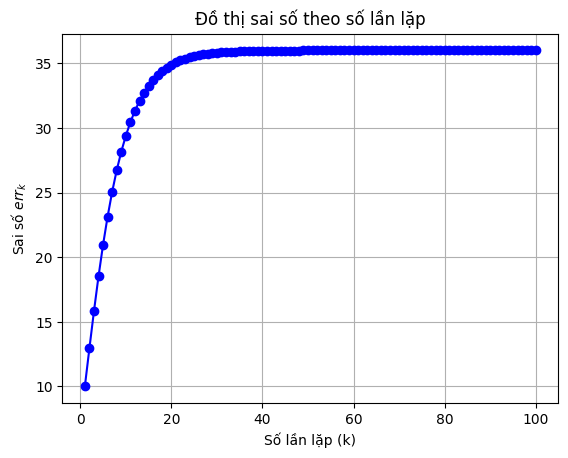

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x, alpha, beta):
    x1, x2 = x
    return 0.5 * x1**2 + 0.5 * x2**2 + (alpha + 1) * x2 - beta

def gradient(x, alpha):
    x1, x2 = x
    grad_x1 = x1
    grad_x2 = x2 + alpha + 1
    return (grad_x1, grad_x2)

# Tính sai số err_k
def compute_error(x_optimal, x_current, alpha):
    grad_optimal = gradient(x_optimal, alpha)
    grad_current = gradient(x_current, alpha)
    error = np.linalg.norm(np.array(grad_optimal) - np.array(grad_current))**2
    return error

alpha = 2
beta = 25

# Learning rate
learning_rate = 1 / (alpha + 1)

# Điểm tối ưu x*
x_optimal = (0, -alpha - 1)

# Điểm khởi tạo
initial_x = (1, 0)

# Số lần lặp
num_iterations = 100

# Lưu trữ sai số err_k
errors = []

# Thực hiện Gradient Descent và tính sai số
x = initial_x
for k in range(num_iterations):
    grad_current = gradient(x, alpha)
    error_k = compute_error(x_optimal, x, alpha)
    errors.append(error_k)
    
    x1_update = 0.5 * x[0]
    x2_update = 0.5 * (x[1] - alpha - 1)
    x = (x[0] - learning_rate * x1_update, x[1] - learning_rate * x2_update)

# Vẽ đồ thị sai số
plt.plot(range(1, num_iterations + 1), errors, marker='o', linestyle='-', color='b')
plt.xlabel('Số lần lặp (k)')
plt.ylabel('Sai số $err_k$')
plt.title('Đồ thị sai số theo số lần lặp')
plt.grid(True)
plt.show()


4. Hãy tìm learning rate trong thuật toán Gradient Descent của bài toán (1) theo phương pháp exact line search. Từ đó rút ra nhận xét cho các điểm cập nhật $x^{(k)}$.

In [67]:

from sympy import symbols, diff , Matrix ,solve,latex
import numpy as np
from IPython.display import display, Markdown
# Định nghĩa biến ký hiệu vector
x1,x2 = symbols('x1 x2')  # Tạo một vector x gồm 2  thành phần x1, x2 
x = symbols('x')
x = [x1,x2]
alpha = 2
beta = 25
# Định nghĩa hàm số dựa trên vector x (ví dụ: f = x1^2 + x2^2 )
f = 1/2*x1**2 + 1/2*x2**2 + (alpha+1)*x2 - beta

# Tính gradient của hàm số f đối với vector x
gradient_fx = Matrix([diff(f, xi) for xi in x])
hessian_fx = Matrix([[diff(f, xi, xj) for xi in x] for xj in x])
# In kết quả
print(f"gradient_f = {gradient_fx}")
print(f"hessian_fx = {hessian_fx}")
s = symbols('s')
df_dx1 = diff(f,x1)
df_dx2 = diff(f,x2)
tk = Matrix([[x1],[x2]]) - s*Matrix([df_dx1, df_dx2])
tk

gradient_f = Matrix([[1.0*x1], [1.0*x2 + 3]])
hessian_fx = Matrix([[1.00000000000000, 0], [0, 1.00000000000000]])


Matrix([
[      -1.0*s*x1 + x1],
[-s*(1.0*x2 + 3) + x2]])

In [69]:
nghiem_s = solve(diff(f.subs({x1: tk[0], x2:tk[1]}),s))
nghiem_s[0]

{s: 1.00000000000000}

In [65]:
nabla = '\u2207'
display(Markdown(f"Điểm s để f(x-s.{nabla}.f(x)) nhỏ nhất là : ${latex(nghiem_s[0][s])}$"))


Điểm s để f(x-s.∇.f(x)) nhỏ nhất là : $1.0$

Vậy $t=1$ , điểm $x^{k} = x^{k-1} - \nabla x^{k-1}$

## ------------------------------------------------ Hết -----------------------------------------------

### Lưu ý: sinh viên không được sử dụng internet. Giám thị không giải thích gì thêm.

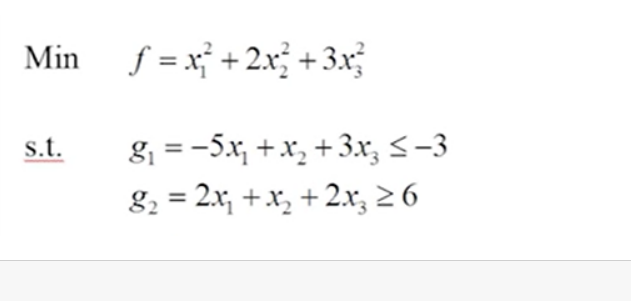

In [43]:
from cvxopt import matrix, solvers

# Khai báo hàm mục tiêu và các ràng buộc
P = matrix([[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])
q = matrix([0.0, 0.0, 0.0])
G = matrix([[-5.0, 1.0, 3.0],[-2.0, -1.0, -2.0]]).T
h = matrix([-3.0,-6.0])

# Giải bài toán tối ưu
sol = solvers.qp(P, q, G, h)

print(sol['x'])


     pcost       dcost       gap    pres   dres
 0:  2.3571e+00  4.5609e+00  4e+00  4e-01  8e+00
 1:  3.2978e+00  3.1725e+00  4e-01  5e-02  9e-01
 2:  3.1199e+00  3.0388e+00  8e-02  7e-17  2e-15
 3:  3.0860e+00  3.0851e+00  1e-03  7e-17  2e-15
 4:  3.0857e+00  3.0857e+00  1e-05  9e-17  6e-16
 5:  3.0857e+00  3.0857e+00  1e-07  5e-17  2e-15
Optimal solution found.
[ 2.06e+00]
[ 5.14e-01]
[ 6.86e-01]



In [40]:
import cvxpy as cp
import numpy as np

# Generate a random non-trivial quadratic program.

P = np.array([[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])
q = np.array([[0.0, 0.0, 0.0]]).T
G = np.array([[-5.0, 1.0, 3.0],[-2.0, -1.0, -2.0]])
h = np.array([-3.0,-6.0]).T


# Define and solve the CVXPY problem.
n = 3
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize((1/2)*cp.quad_form(x, P) + q.T @ x),
     [G @ x <= h])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution corresponding to the inequality constraints is")
print(prob.constraints[0].dual_value)


The optimal value is 3.085714285714285
A solution x is
[2.05714286 0.51428571 0.68571429]
A dual solution corresponding to the inequality constraints is
[0.         1.02857143]


In [41]:
import cvxpy as cp
import numpy as np

# Define the variables
x = cp.Variable(3)

# Define the objective function
P = np.array([[1.0, 0.0, 0.0], [0.0, 2.0, 0.0], [0.0, 0.0, 3.0]])
q = np.array([0.0, 0.0, 0.0])
objective = cp.quad_form(x, P) + q.T @ x

# Define the constraints
constraints = [
    -5 * x[0] + x[1] + 3 * x[2] <= -3,
    2 * x[0] + x[1] + 2 * x[2] >= 6
]

# Define the optimization problem
problem = cp.Problem(cp.Minimize(objective), constraints)

# Solve the problem
problem.solve()

# Get the optimal value and the optimal variable values
optimal_value = problem.value
optimal_vars = x.value

print("Optimal value:", optimal_value)
print("Optimal variables:", optimal_vars)

Optimal value: 6.171428571428571
Optimal variables: [2.05714286 0.51428571 0.68571429]
